## Imports

In [ ]:
import tensorflow as tf
import tensorflow.keras.models as kmod
import tensorflow.keras.layers as klay
import tensorflow.keras.utils as kutils
import numpy as np
import sklearn.ensemble
import sklearn.preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Min-Max Scaling
train_min = np.min(x_train, axis=(1, 2))[:, np.newaxis, np.newaxis]
train_max = np.max(x_train, axis=(1, 2))[:, np.newaxis, np.newaxis]
x_train = (x_train - train_min) / (train_max - train_min)
test_min = np.min(x_test, axis=(1, 2))[:, np.newaxis, np.newaxis]
test_max = np.max(x_test, axis=(1, 2))[:, np.newaxis, np.newaxis]
x_test = (x_test - test_min) / (test_max - test_min)

# Transform labels
y_train_cat = kutils.to_categorical(y_train)
y_test_cat = kutils.to_categorical(y_test)

# Transform input to be 4D
x_train = x_train[..., None]
x_test = x_test[..., None]

11490434/11490434 [==============================] - 0s 0us/step


## Conventional DCNN with Training


In [ ]:
# create model
model = kmod.Sequential()

# add model layers
model.add(klay.Conv2D(
    filters=32, kernel_size=3, activation='relu', 
    input_shape=x_train.shape[1:]))
model.add(klay.MaxPool2D())
model.add(klay.Conv2D(
    filters=32, kernel_size=3, activation='relu', 
    kernel_initializer="glorot_uniform"))
model.add(klay.MaxPool2D())
model.add(klay.Conv2D(
    filters=32, kernel_size=3, activation='relu', 
    kernel_initializer="glorot_uniform"))
model.add(klay.Flatten())
model.add(klay.Dense(
    units=10, activation='softmax', 
    kernel_initializer="glorot_uniform"))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 18s - loss: 0.1902 - accuracy: 0.9413 - val_loss: 0.0572 - val_accuracy: 0.9810 - 18s/epoch - 10ms/step
Epoch 2/5
1875/1875 - 6s - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0430 - val_accuracy: 0.9861 - 6s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 6s - loss: 0.0421 - accuracy: 0.9872 - val_loss: 0.0389 - val_accuracy: 0.9863 - 6s/epoch - 3ms/step
Epoch 4/5
1875/1875 - 6s - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0294 - val_accuracy: 0.9901 - 6s/epoch - 3ms/step
Epoch 5/5
1875/1875 - 6s - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0356 - val_accuracy: 0.9880 - 6s/epoch - 3ms/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 288)               0

In [ ]:
cnn_acc = model.evaluate(x=x_test, y=y_test_cat, verbose=False)
print("Trained CNN Accuracy = {}%".format(np.round(cnn_acc[1]*100, 2)))

Trained CNN Accuracy = 98.8%


## Extracting Features with Random Network Weights
In this second step, only the final classification layer is trained. All hidden layers are randomly initialized and kept that way. This network will be trained and evaluated several times to identify the stability of these random-weight features.

In [ ]:
random_feature_accuracies = []
random_feature_models = []

for ii in range(10):
    # create model
    model = kmod.Sequential()

    # add model layers
    model.add(klay.Conv2D(
        filters=32, kernel_size=3, activation='relu', 
        input_shape=x_train.shape[1:], 
        trainable=False))
    model.add(klay.MaxPool2D(trainable=False))
    model.add(klay.Conv2D(
        filters=32, kernel_size=3, activation='relu', 
        kernel_initializer="glorot_uniform", 
        trainable=False))
    model.add(klay.MaxPool2D(trainable=False))
    model.add(klay.Conv2D(
        filters=32, kernel_size=3, activation='relu', 
        kernel_initializer="glorot_uniform", 
        trainable=False))
    model.add(klay.Flatten(trainable=False))
    model.add(klay.Dense(
        units=10, activation='softmax', 
        kernel_initializer="glorot_uniform"))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=5, verbose=0)
    random_feature_accuracies.append(model.evaluate(x=x_test, y=y_test_cat, verbose=0)[1])
    random_feature_models.append(model)

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 flatten_10 (Flatten)        (None, 288)             

The accuracy of the partially trained DCNN is slightly worse than that of the fully trained network but very stable across iterations.

In [ ]:
print("Random Feature Accuracy = ({} +/- {})%".format(
    np.round(np.mean(random_feature_accuracies)*100, 2), 
    np.round(np.std(random_feature_accuracies)*100, 2)))

Random Feature Accuracy = (90.93 +/- 1.33)%


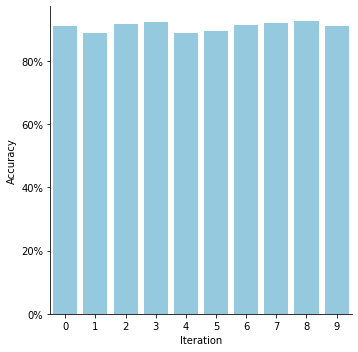

In [ ]:
random_feature_accuracies_df = pd.DataFrame({
    "Iteration": range(10), 
    "Accuracy": random_feature_accuracies})
myFigure = sns.catplot(
    x="Iteration", y="Accuracy", data=random_feature_accuracies_df, 
    kind="bar", color="skyblue");
myFigure.ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda num, tick_num: "{:.0f}%".format(num*100)))

### Alternative Classifiers
The single-layer classification step is relatively simple. We can also look at what happens if we classify the random-weight features, extracted from the second-to-last layer of the DCNN above, with a more sophisticated method such as a random forest.

In [ ]:
random_features = []
random_feature_forest_accs = []

for model in random_feature_models:
    # Extract features from submodel
    submodel = kmod.Sequential(layers=model.layers[:-1])
    features_train = submodel.predict(x_train)
    features_test = submodel.predict(x_test)
    random_features.append([features_train, features_test])
    
    # Random forest model
    rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
    rf.fit(X=features_train, y=y_train)
    random_feature_forest_accs.append(rf.score(X=features_test, y=y_test))

313/313 [==============================] - 1s 2ms/step


A random forest evaluated on the test data exhibits a high accuracy across all iterations.

In [ ]:
print("Random Forest Accuracy on Random-Weight Features = ({} +/- {})%".format(
    np.round(np.mean(random_feature_forest_accs)*100, 2), 
    np.round(np.std(random_feature_forest_accs)*100, 2)))

In [ ]:
random_feature_forest_accs_df = pd.DataFrame({
    "Iteration": range(10), 
    "Accuracy": random_feature_forest_accs})
myFigure = sns.catplot(
    x="Iteration", y="Accuracy", data=random_feature_forest_accs_df, 
    kind="bar", color="skyblue");
myFigure.ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda num, tick_num: "{:.0f}%".format(num*100)))

#### Unsupervised Clustering
Unsupervised clustering of the mean features shows a very clear separation of the individual classes. For this clustering, I used [t-Distributed Stochastic Neighbor Embedding (t-SNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

In [ ]:
# Average test features over all iterations
all_test_features = np.mean(np.stack([s[1] for s in random_features]), axis=0)
all_train_features = np.mean(np.stack([s[0] for s in random_features]), axis=0)

In [ ]:
# Compute t-SNE
import sklearn.manifold
tsne_features = sklearn.manifold.TSNE().fit_transform(X=all_test_features)
tsne_features = pd.DataFrame(tsne_features, columns=("X", "Y"))
tsne_features["Label"] = y_test
tsne_features["Label"] = tsne_features["Label"].astype("str")

In [ ]:
sns.relplot(
    data=tsne_features, x="X", y="Y", hue="Label",
    palette=sns.color_palette(palette="bright", n_colors=10))

## Conclusion
We have shown that initializing a neural network with random weights and subsequently training only the final output layer sufficiently classifies the MNIST handwritten digits. 

Simply training the final layer results in accuracies of $\sim 90\%$, far greater than what would be expected of random guessing ($\sim 10\%$), while a non-parametric, random forest classifier trained on the random-weight features will exhibit nearly equivalent accuracy as the fully trained DCNN ($\sim 95\%$) while requiring only a fraction of the training time.

These results indicate that the MNIST dataset is too trivial to serve as a benchmark dataset. 